# Census Data Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading in Data

In [2]:
# Read in the train/test census datasets
df_train_raw = pd.read_csv('data/census_income_learn.csv')
df_test_raw = pd.read_csv('data/census_income_test.csv')

In [3]:
df_train_raw.head()

,73,Not in universe,0,0.1,High school graduate,0.2,Not in universe.1,Widowed,Not in universe or children,Not in universe.2,...,United-States,United-States.1,United-States.2,Native- Born in the United States,0.7,Not in universe.8,2,0.8,95,- 50000.
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


## Data Cleaning

In [4]:
# Adding column names to the raw datasets

columns = [
    'age', 'class of worker', 'detailed industry code', 'detailed occupation code', 'education', 
    'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code',
    'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 
    'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat',
    'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 
    'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago',
    'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother',
    'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 
    'weeks worked in year', 'year', 'income'
]

df_train_raw.columns = columns
df_test_raw.columns = columns

In [5]:
# Remove columns that are potentially duplicated of other columns, or carry no beneficical information, have too many nans,

remove_columns = [
    'detailed industry code', 'detailed occupation code', 'enroll in edu inst last wk', 'major industry code', 'major occupation code',
    'hispanic origin', 'member of a labor union', 'reason for unemployment', 'tax filer stat', 'region of previous residence', 'state of previous residence', 
    'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 
    'migration code-move within reg','live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 
    'country of birth father', 'country of birth mother', 'country of birth self', 'fill inc questionnaire for veterans admin', 'veterans benefits',
    'year', 'instance weight', 'own business or self employed'
]

df_train_raw = df_train_raw.drop(columns=remove_columns)
df_test_raw = df_test_raw.drop(columns=remove_columns)

In [6]:
len(df_train_raw)

199522

In [7]:
# Insert NaNs for unknown entries
df_train_raw = df_train_raw.replace(' ?', np.nan)
df_test_raw = df_test_raw.replace(' ?', np.nan)
df_train_raw = df_train_raw.replace(' Not in universe', np.nan)
df_test_raw = df_test_raw.replace(' Not in universe', np.nan)
df_train_raw = df_train_raw.dropna()
df_test_raw = df_test_raw.dropna()
len(df_train_raw)

99278

In [8]:
# Reformat prediction column as binary
df_train_raw['income'] = df_train_raw['income'].map({' - 50000.': 0, ' 50000+.': 1})
df_test_raw['income'] = df_test_raw['income'].map({' - 50000.': 0, ' 50000+.': 1})

## Exploratory Data Analysis

In [9]:
df_train_raw.describe(include='all')

,age,class of worker,education,wage per hour,marital stat,race,sex,full or part time employment stat,capital gains,capital losses,dividends from stocks,num persons worked for employer,citizenship,weeks worked in year,income
count,99278.000000,99278,99278,99278.000000,99278,99278,99278,99278,99278.000000,99278.000000,99278.000000,99278.000000,99278,99278.000000,99278.000000
unique,NaN,8,16,NaN,7,5,2,8,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,Private,High school graduate,NaN,Married-civilian spouse present,White,Male,Children or Armed Forces,NaN,NaN,NaN,NaN,Native- Born in the United States,NaN,NaN
freq,NaN,72028,32354,NaN,58312,85332,52226,49597,NaN,NaN,NaN,NaN,86532,NaN,NaN
mean,38.514203,NaN,NaN,111.393692,NaN,NaN,NaN,NaN,763.819718,61.538568,212.431858,3.634028,NaN,44.628447,0.115615
std,13.090217,NaN,NaN,381.626175,NaN,NaN,NaN,NaN,6308.585741,342.156465,2065.563626,2.075448,NaN,14.602205,0.319764
min,15.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,28.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,46.000000,0.000000
50%,37.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.000000,NaN,52.000000,0.000000
75%,47.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,6.000000,NaN,52.000000,0.000000


### Education

In [10]:
df_train_raw.groupby('education').describe()['income']

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th grade,3323.0,0.015949,0.125299,0.0,0.0,0.0,0.0,1.0
11th grade,3735.0,0.016867,0.128792,0.0,0.0,0.0,0.0,1.0
12th grade no diploma,1184.0,0.027027,0.162231,0.0,0.0,0.0,0.0,1.0
1st 2nd 3rd or 4th grade,657.0,0.012177,0.109757,0.0,0.0,0.0,0.0,1.0
5th or 6th grade,1395.0,0.012903,0.112898,0.0,0.0,0.0,0.0,1.0
7th and 8th grade,2118.0,0.026912,0.161865,0.0,0.0,0.0,0.0,1.0
9th grade,2239.0,0.014739,0.120532,0.0,0.0,0.0,0.0,1.0
Associates degree-academic program,3512.0,0.113041,0.316688,0.0,0.0,0.0,0.0,1.0
Associates degree-occup /vocational,4278.0,0.092567,0.289858,0.0,0.0,0.0,0.0,1.0


In [11]:
# All children have an income of less than 50,000 K which is intuitive given minors don't have their own income. It therefore makes sense to exlude all children from the data set
# to train the classifier
df_train_raw = df_train_raw[df_train_raw['education'] != ' Children']
df_test_raw = df_test_raw[df_test_raw['education'] != ' Children']

In [12]:
# It can also be seen that the proportion of people that earn more than 50K increases with the level of education (seen by observing mean income per education group above)
# There are also too many categories that can be easily grouped up into broader categories
education_mapping = {
    ' Less than 1st grade': 'No Education',
    ' 1st 2nd 3rd or 4th grade': 'Middle School',
    ' 5th or 6th grade': 'Middle School',
    ' 7th and 8th grade': 'High School',
    ' 9th grade': 'High School',
    ' 10th grade': 'High School',
    ' 11th grade': 'High School',
    ' 12th grade no diploma': 'High School',
    ' High school graduate': 'High School Graduate',
    ' Some college but no degree': 'High School Graduate',
    ' Associates degree-academic program': 'Associates Degree',
    ' Associates degree-occup /vocational': 'Associates Degree',
    ' Bachelors degree(BA AB BS)': 'Undergraduate Degree',
    ' Masters degree(MA MS MEng MEd MSW MBA)': 'Postgraduate Degree',
    ' Prof school degree (MD DDS DVM LLB JD)': 'Advanced Degree',
    ' Doctorate degree(PhD EdD)': 'Advanced Degree',
}

df_train_raw['education'] = df_train_raw['education'].map(education_mapping)
df_test_raw['education'] = df_test_raw['education'].map(education_mapping)

In [13]:
df_train_raw.groupby('education').describe()['income']

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Advanced Degree,2586.0,0.593194,0.491333,0.0,0.0,1.0,1.0,1.0
Associates Degree,7790.0,0.101797,0.302401,0.0,0.0,0.0,0.0,1.0
High School,12599.0,0.018890,0.136143,0.0,0.0,0.0,0.0,1.0
High School Graduate,52480.0,0.063415,0.243710,0.0,0.0,0.0,0.0,1.0
Middle School,2052.0,0.012671,0.111875,0.0,0.0,0.0,0.0,1.0
No Education,245.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Postgraduate Degree,5387.0,0.350845,0.477279,0.0,0.0,0.0,1.0,1.0
Undergraduate Degree,16139.0,0.227338,0.419125,0.0,0.0,0.0,0.0,1.0


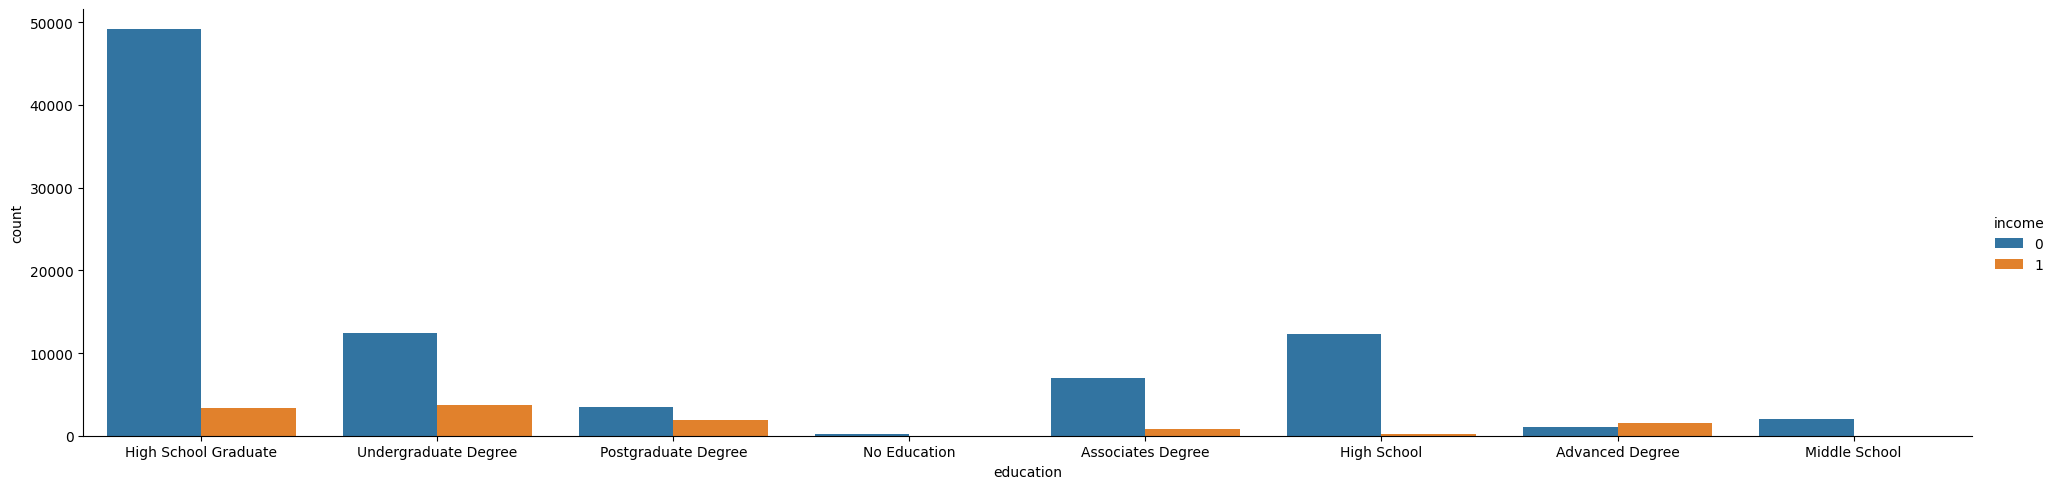

In [14]:
sns.catplot(data=df_train_raw, x="education", kind="count", hue='income', height=5, aspect=4)

### Age

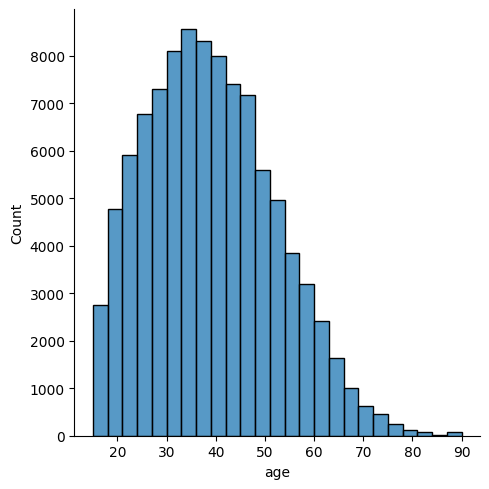

In [15]:
# First lets see how age is distributed
sns.displot(data=df_train_raw, x="age", binwidth=3)

<AxesSubplot: xlabel='age', ylabel='Count'>

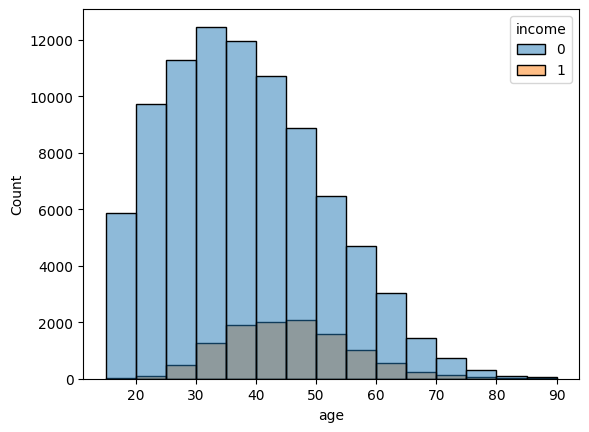

In [16]:
# Let understand the relationship between age and income. 
# It can be seen that high income earners tend to be middle aged
sns.histplot(data=df_train_raw, x='age', hue='income', binwidth=5)

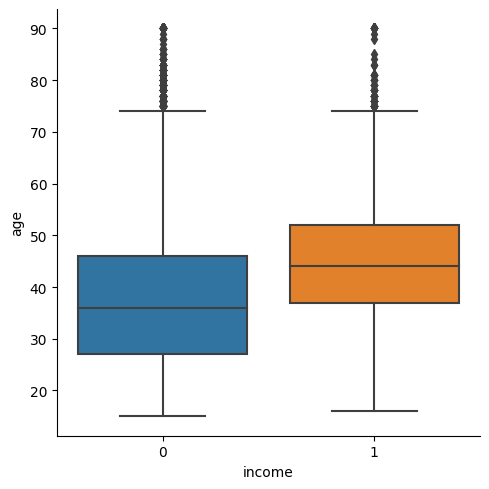

In [17]:
# The following shows that age indeed does affect income, where people who are older being more likely to earn 50K on average
sns.catplot(data=df_train_raw, x='income', y='age', kind="box")

In [18]:
# Given the number of people under 18 that earn more than 50K is negligible, let's create a classifier for adults only, since they are likely to be employed/have access to other sources of income
df_train_raw = df_train_raw[df_train_raw['age'] >= 18]
df_test_raw = df_test_raw[df_test_raw['age'] >= 18]

### Class of Worker

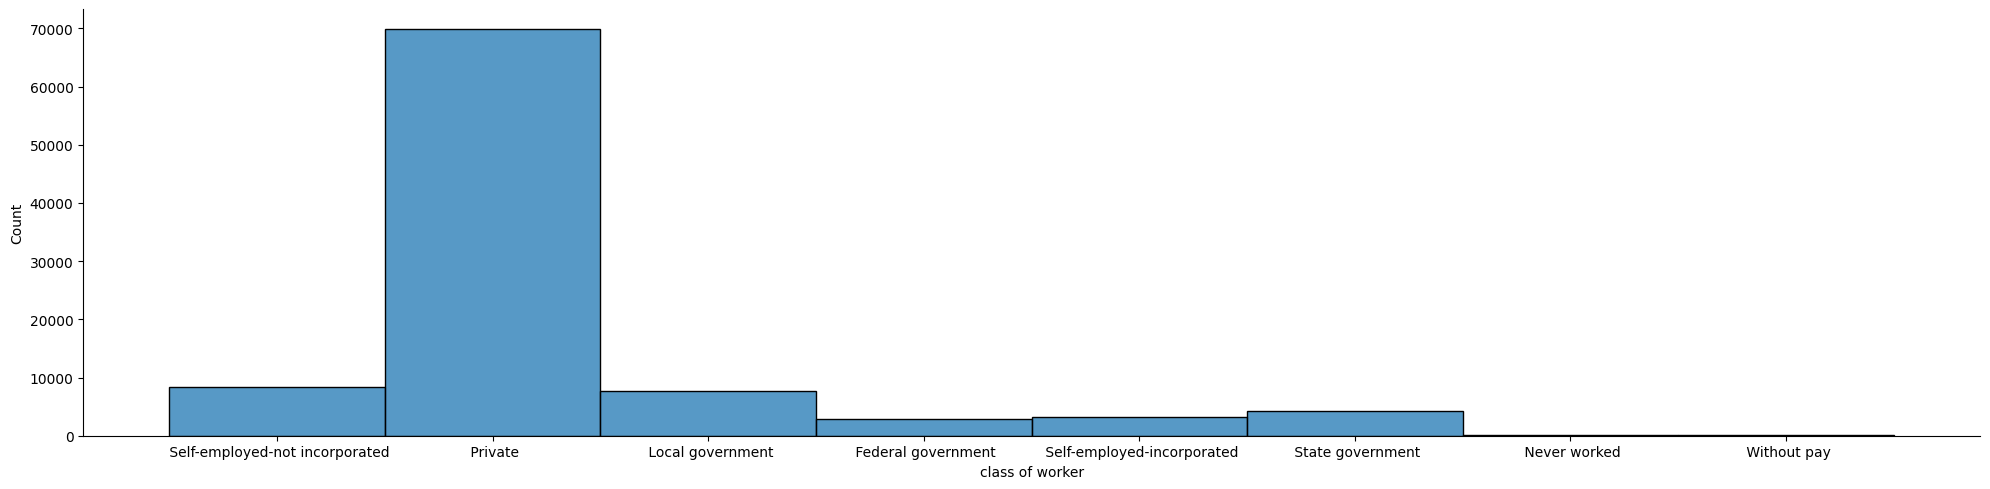

In [19]:
sns.displot(data=df_train_raw, x="class of worker", height=5, aspect=4)

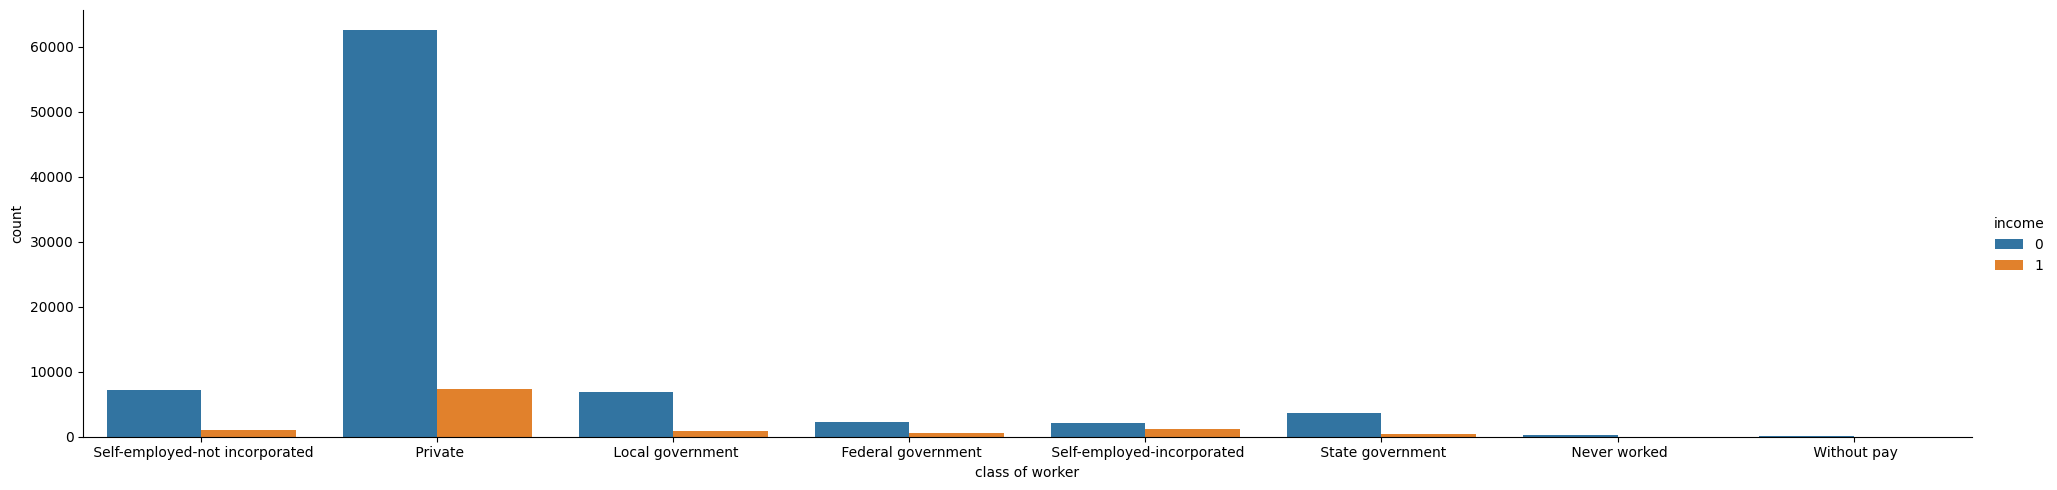

In [20]:
sns.catplot(data=df_train_raw, x="class of worker", kind="count", hue='income', height=5, aspect=4)

## Wage per Hour

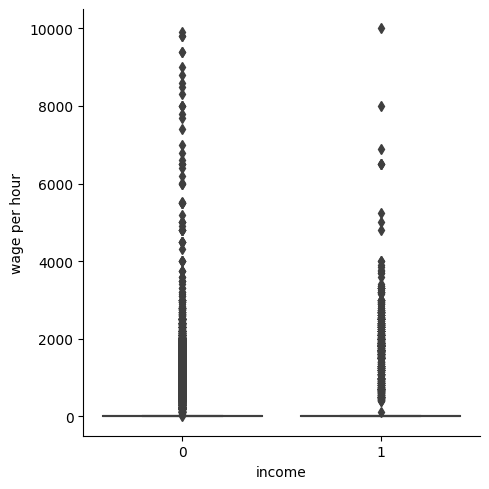

In [21]:
sns.catplot(data=df_train_raw, x='income', y='wage per hour', kind="box")

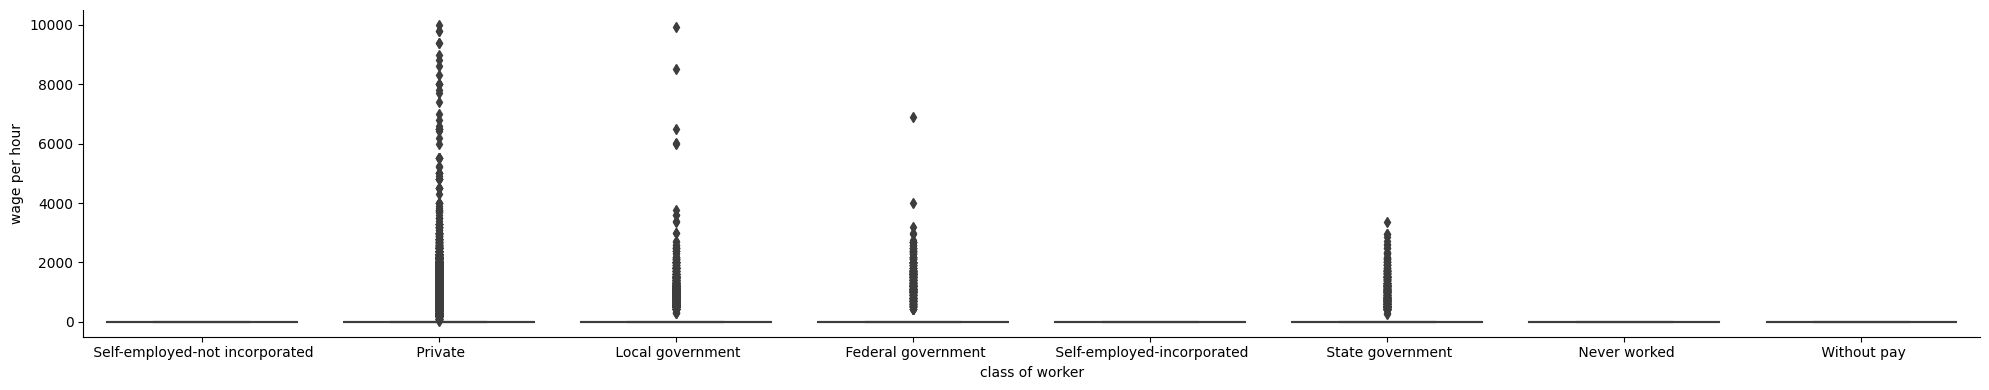

In [22]:
sns.catplot(data=df_train_raw, x='class of worker', y='wage per hour', kind="box", height=4, aspect=5)

In [23]:
# The wages per hour column seems to have no signal at all, and data entries might be meaningless given most of them are zeros.
df_train_raw = df_train_raw.drop(columns=['wage per hour'])
df_test_raw = df_test_raw.drop(columns=['wage per hour'])

### Marital Status

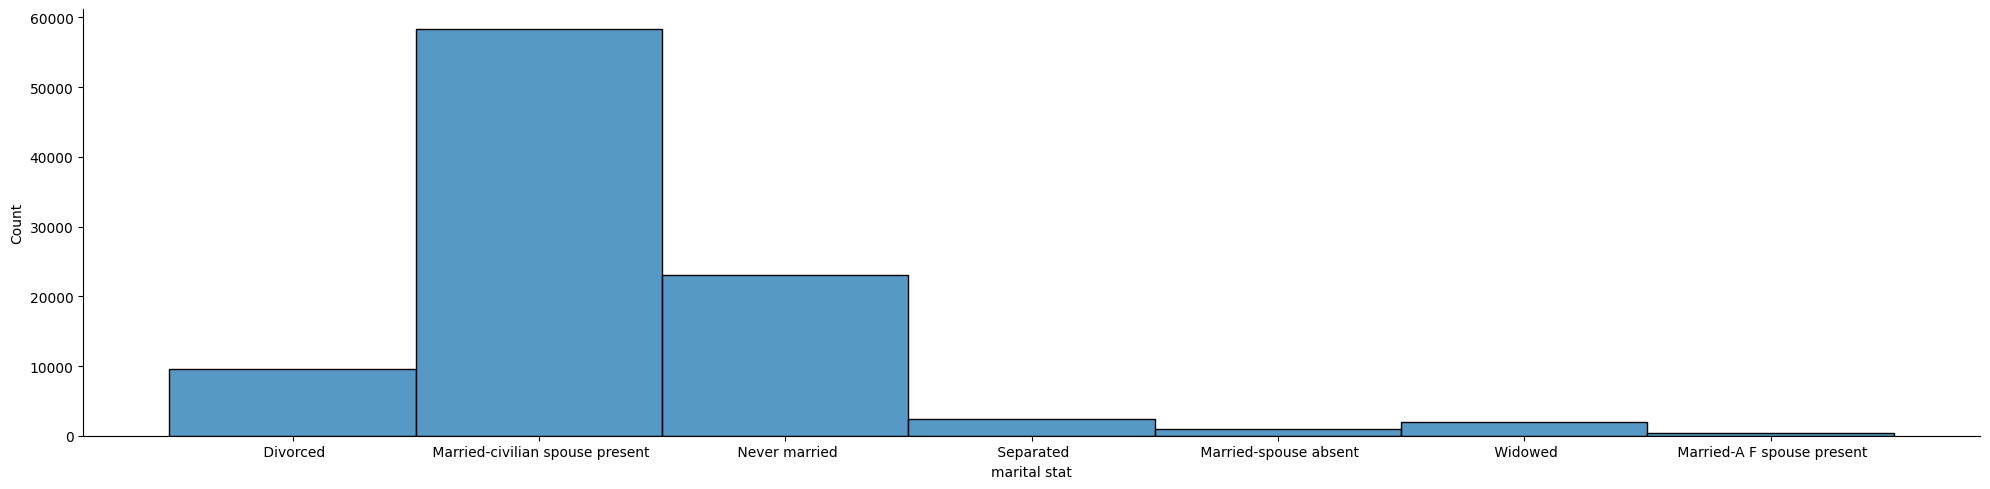

In [24]:
sns.displot(data=df_train_raw, x="marital stat", height=5, aspect=4)

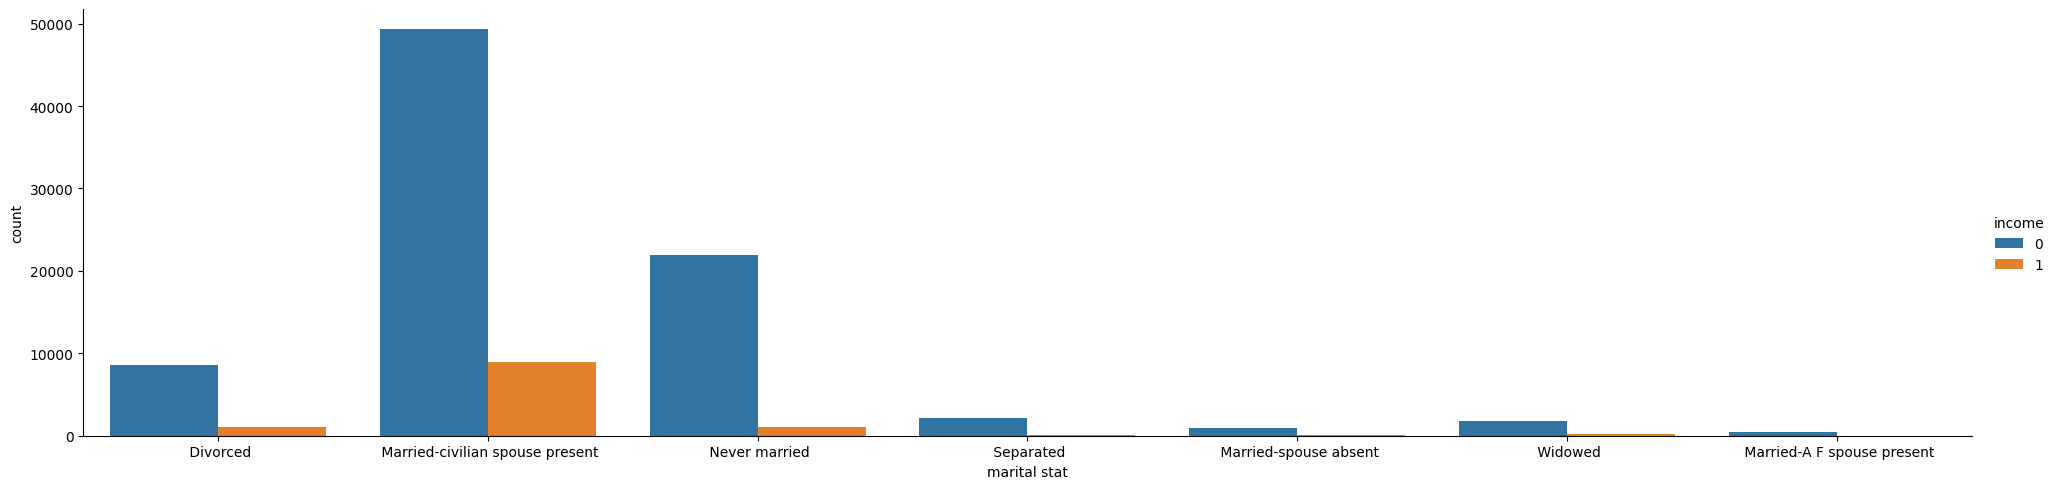

In [25]:
sns.catplot(data=df_train_raw, x="marital stat", kind="count", hue='income', height=5, aspect=4)

### Race

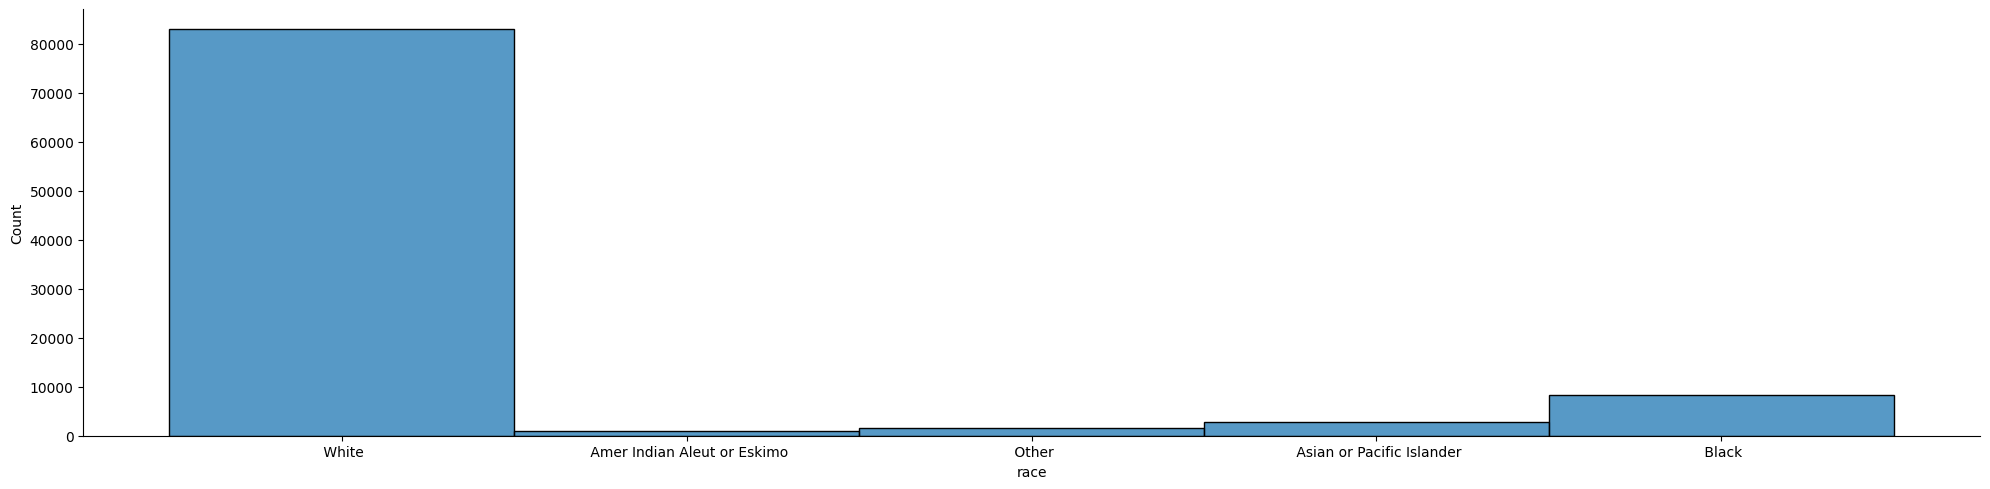

In [26]:
sns.displot(data=df_train_raw, x="race", height=5, aspect=4)

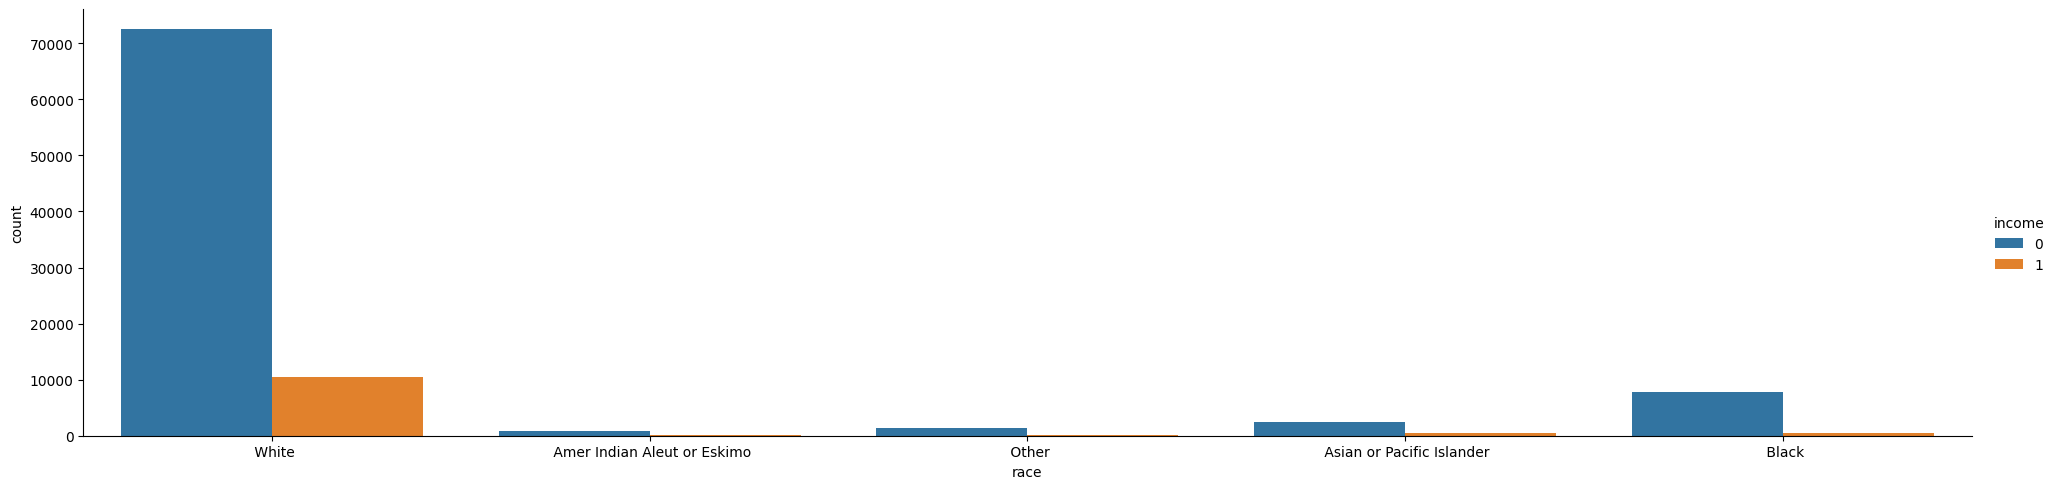

In [27]:
sns.catplot(data=df_train_raw, x="race", kind="count", hue='income', height=5, aspect=4)

# Sex

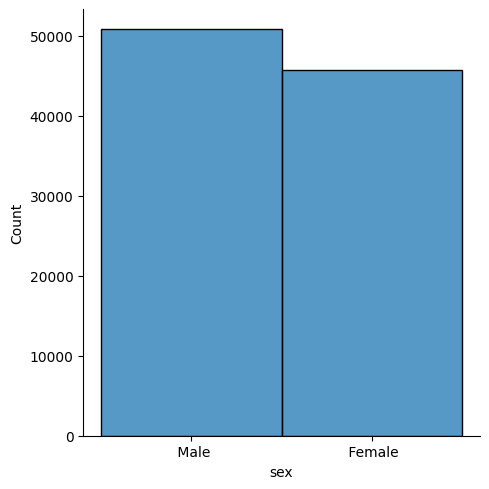

In [28]:
# The ratio of males to females seems slightly unbalanced 
sns.displot(data=df_train_raw, x="sex")

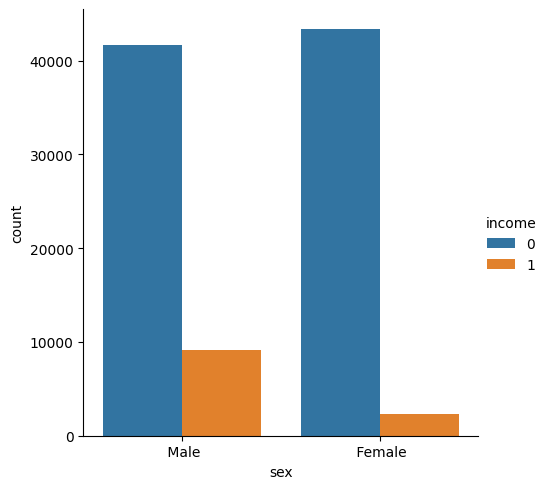

In [29]:
# Males seem to make more than 50k on average, so there seems to be a signal from sex to income
sns.catplot(data=df_train_raw, x="sex", kind="count", hue='income')

In [30]:
df_train_raw['sex'] = df_train_raw['sex'].map({' Male': 0, ' Female': 1})
df_test_raw['sex'] = df_test_raw['sex'].map({' Male': 0, ' Female': 1})

### Employment Status

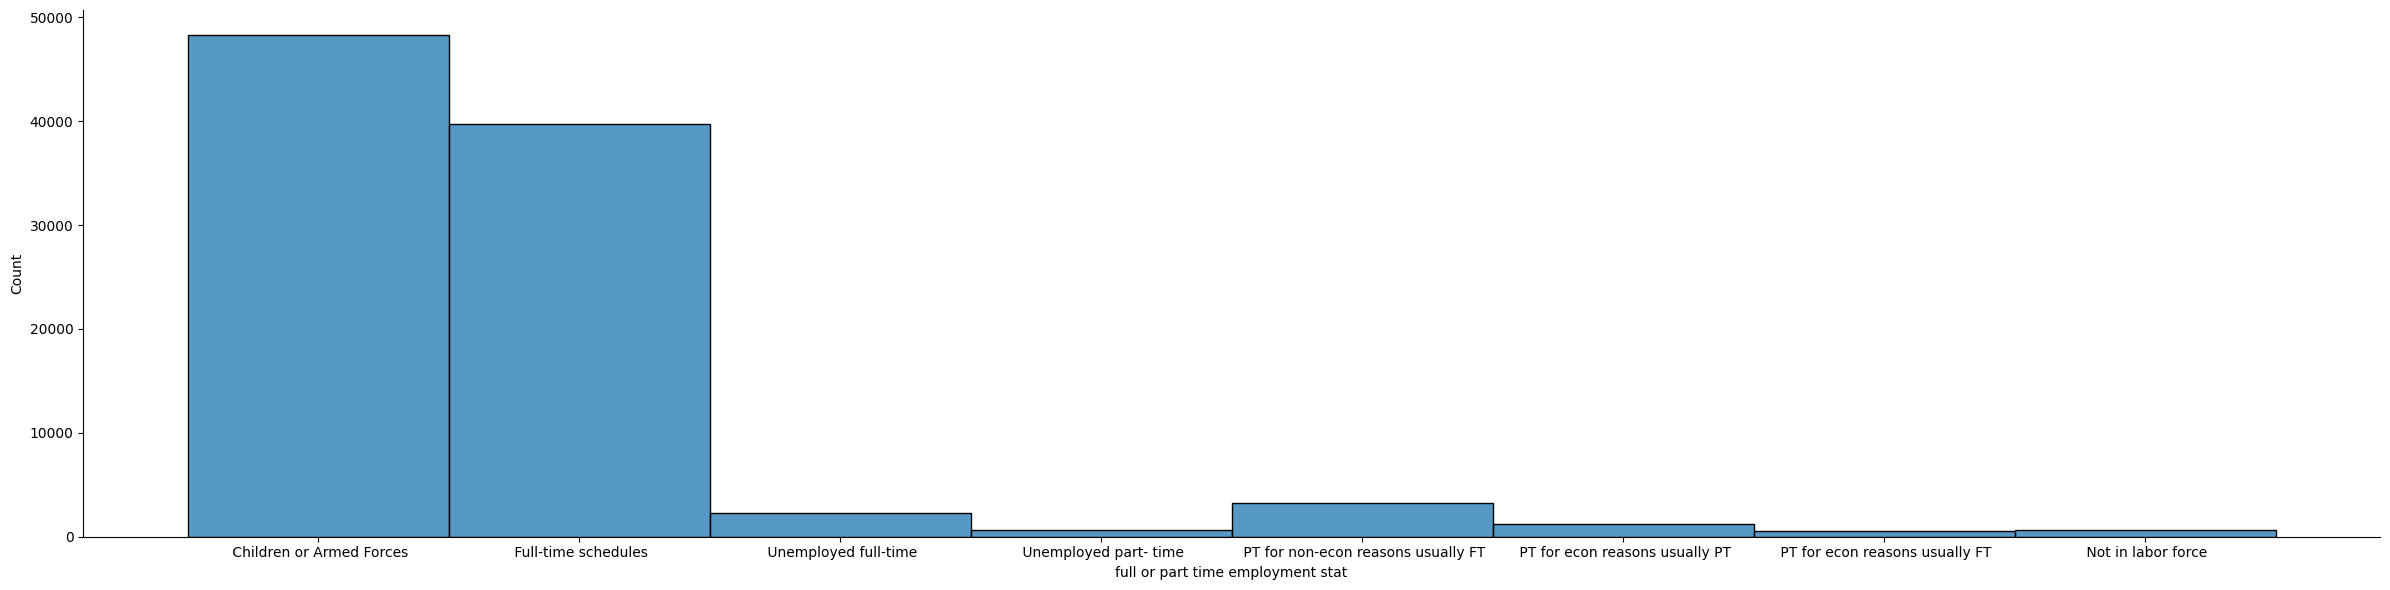

In [31]:
# full or part time employment stat
sns.displot(data=df_train_raw, x="full or part time employment stat", height=6, aspect=4)

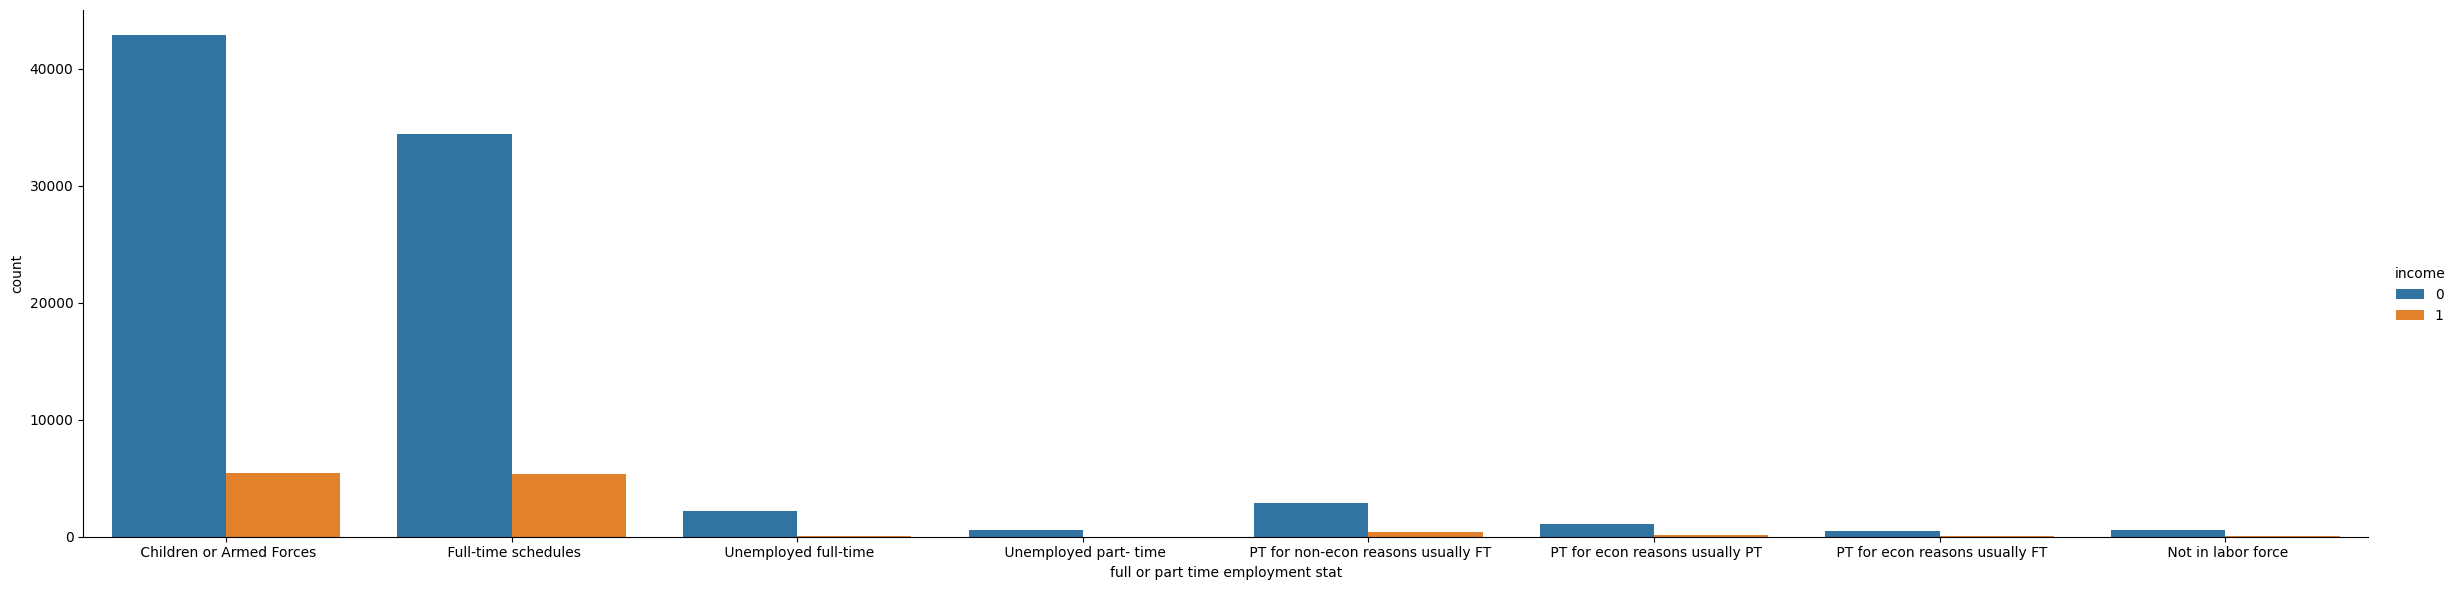

In [32]:
sns.catplot(data=df_train_raw, x="full or part time employment stat", kind="count", hue='income', height=6, aspect=4)

In [33]:
df_train_raw.groupby('full or part time employment stat').describe()['income']

,count,mean,std,min,25%,50%,75%,max
full or part time employment stat,,,,,,,,
Children or Armed Forces,48278.0,0.111976,0.315341,0.0,0.0,0.0,0.0,1.0
Full-time schedules,39761.0,0.134931,0.341654,0.0,0.0,0.0,0.0,1.0
Not in labor force,625.0,0.040000,0.196116,0.0,0.0,0.0,0.0,1.0
PT for econ reasons usually FT,523.0,0.059273,0.236362,0.0,0.0,0.0,0.0,1.0
PT for econ reasons usually PT,1205.0,0.128631,0.334930,0.0,0.0,0.0,0.0,1.0
PT for non-econ reasons usually FT,3272.0,0.120110,0.325140,0.0,0.0,0.0,0.0,1.0
Unemployed full-time,2267.0,0.036612,0.187849,0.0,0.0,0.0,0.0,1.0
Unemployed part- time,604.0,0.029801,0.170180,0.0,0.0,0.0,0.0,1.0


In [34]:
np.unique(df_train_raw['full or part time employment stat'].values)

array([' Children or Armed Forces', ' Full-time schedules',
       ' Not in labor force', ' PT for econ reasons usually FT',
       ' PT for econ reasons usually PT',
       ' PT for non-econ reasons usually FT', ' Unemployed full-time',
       ' Unemployed part- time'], dtype=object)

In [35]:
employment_mapping = {
    ' Full-time schedules': 'Full Time',
    ' PT for econ reasons usually FT': 'Part Time',
    ' PT for econ reasons usually PT': 'Part Time',
    ' PT for non-econ reasons usually FT': 'Part Time',
    ' Not in labor force': 'Not in labor force',
    ' Unemployed part- time': 'Unemployed',
    ' Unemployed full-time': 'Unemployed',
    ' Children or Armed Forces': 'Armed Forces',
}

df_train_raw['full or part time employment stat'] = df_train_raw['full or part time employment stat'].map(employment_mapping)
df_test_raw['full or part time employment stat'] = df_test_raw['full or part time employment stat'].map(employment_mapping)

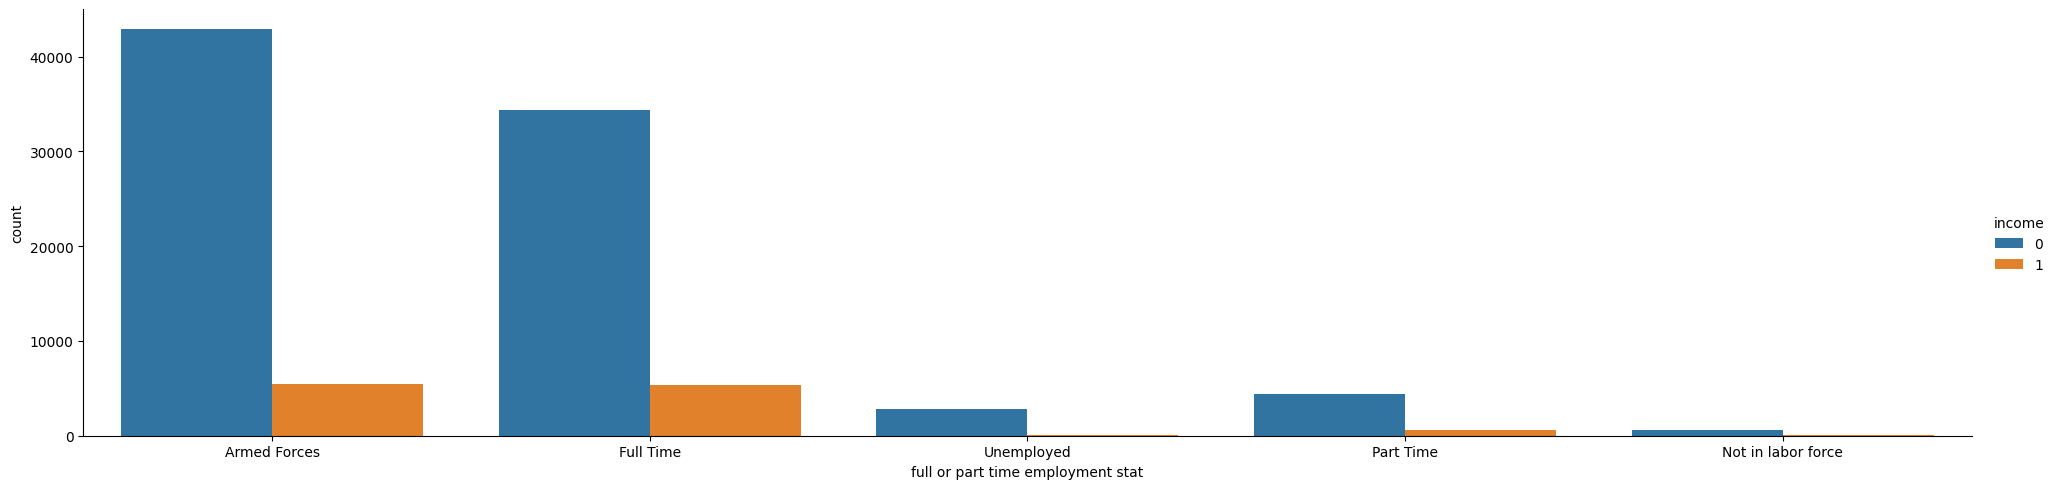

In [36]:
sns.catplot(data=df_train_raw, x="full or part time employment stat", kind="count", hue='income', height=5, aspect=4)

### Capital Gains

It can be seen below that most people don't invest where most capital gain or losses are zero

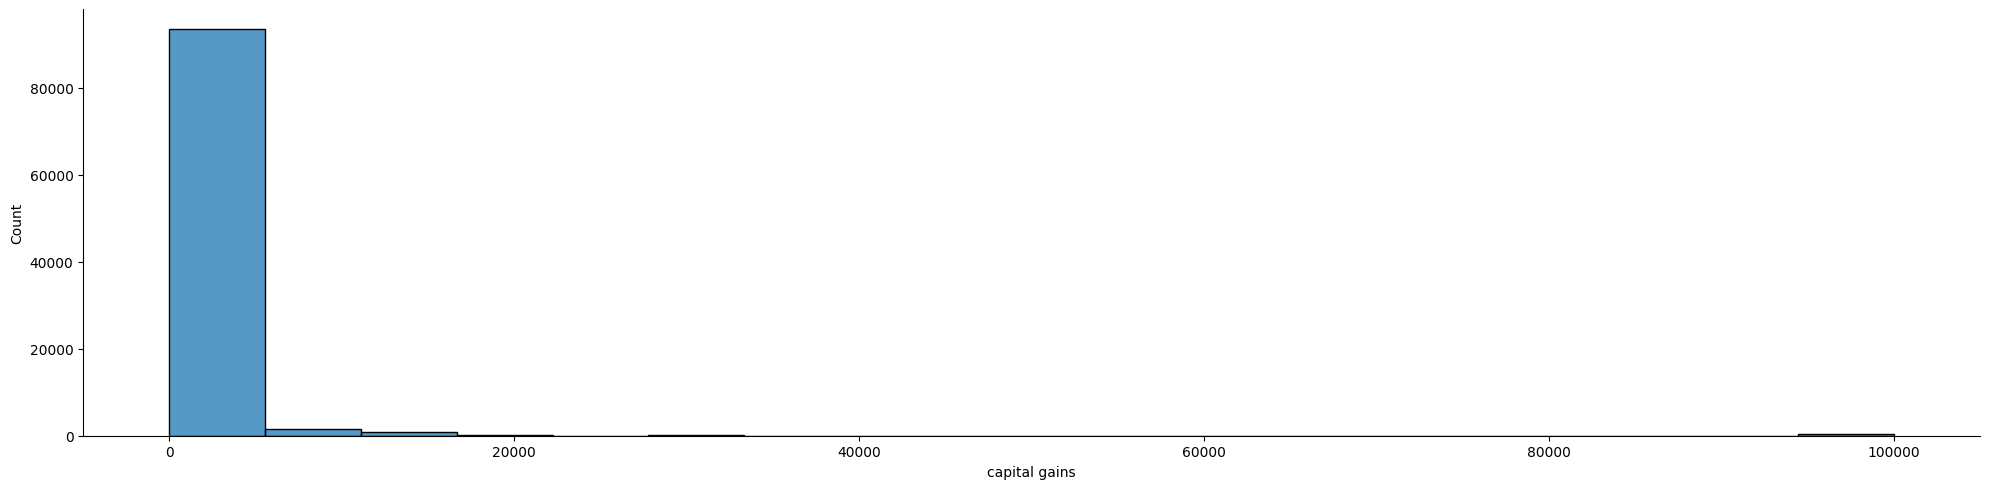

In [37]:
#capital gains
sns.displot(data=df_train_raw, x="capital gains", height=5, aspect=4)

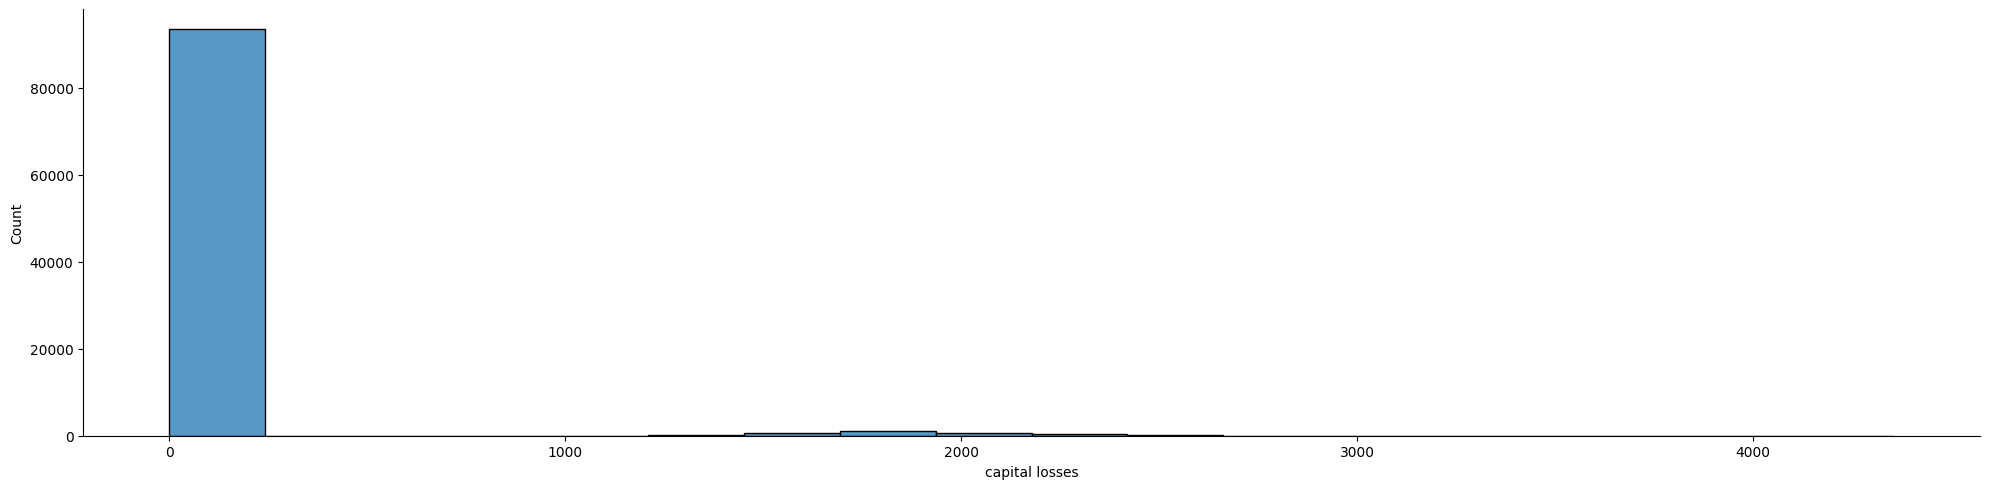

In [38]:
# capital losses	
sns.displot(data=df_train_raw, x="capital losses", height=5, aspect=4)

It seems however that individuals who have higher income (more than 50K) tend to invest more, with their average capital gain as well as losses being noticeable higher

In [39]:
df_train_raw.groupby('income').describe()['capital gains']

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
0,85059.0,230.812319,2027.040664,0.0,0.0,0.0,0.0,99999.0
1,11476.0,4888.383147,17158.360685,0.0,0.0,0.0,0.0,99999.0


In [40]:
df_train_raw.groupby('income').describe()['capital losses']

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
0,85059.0,44.242161,285.409807,0.0,0.0,0.0,0.0,4356.0
1,11476.0,195.349163,609.940441,0.0,0.0,0.0,0.0,3683.0


### Dividends

The same observation made for capital gain and losses can be seen for dividends as well further cementing the argument that higher income earners are more likely to invest

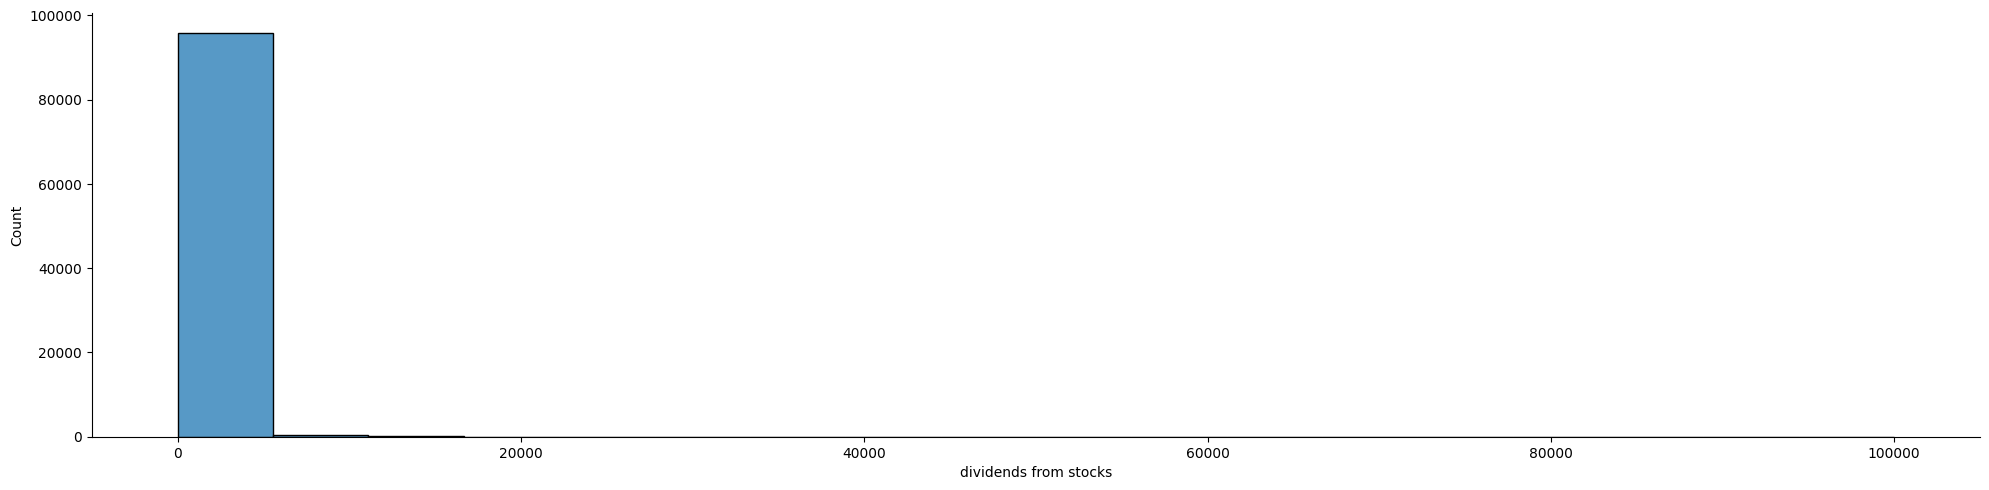

In [41]:
# dividends from stocks
sns.displot(data=df_train_raw, x="dividends from stocks", height=5, aspect=4)

In [42]:
df_train_raw.groupby('income').describe()['dividends from stocks']

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
0,85059.0,92.145664,763.021527,0.0,0.0,0.0,0.0,37500.0
1,11476.0,1150.546793,5620.785414,0.0,0.0,0.0,300.0,99999.0


### Num person worked for Employer

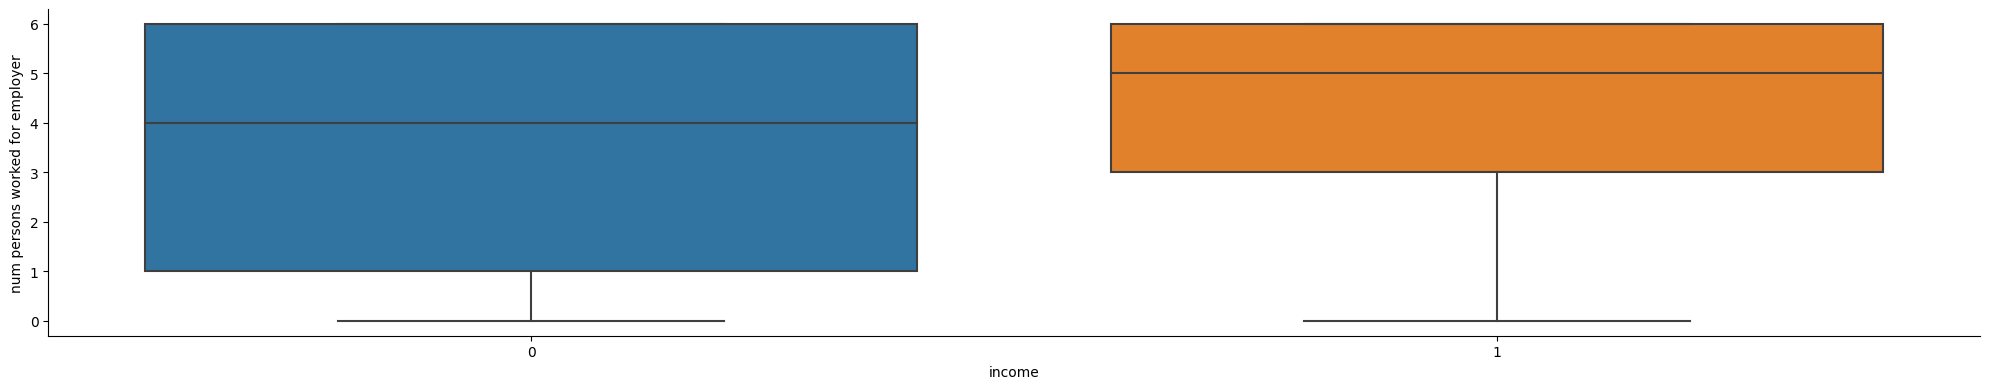

In [43]:
# This shows that higher income individuals tend to work in larger firms
# num persons worked for employer
sns.catplot(data=df_train_raw, x='income', y='num persons worked for employer', kind="box", height=4, aspect=5)

### Citizenship

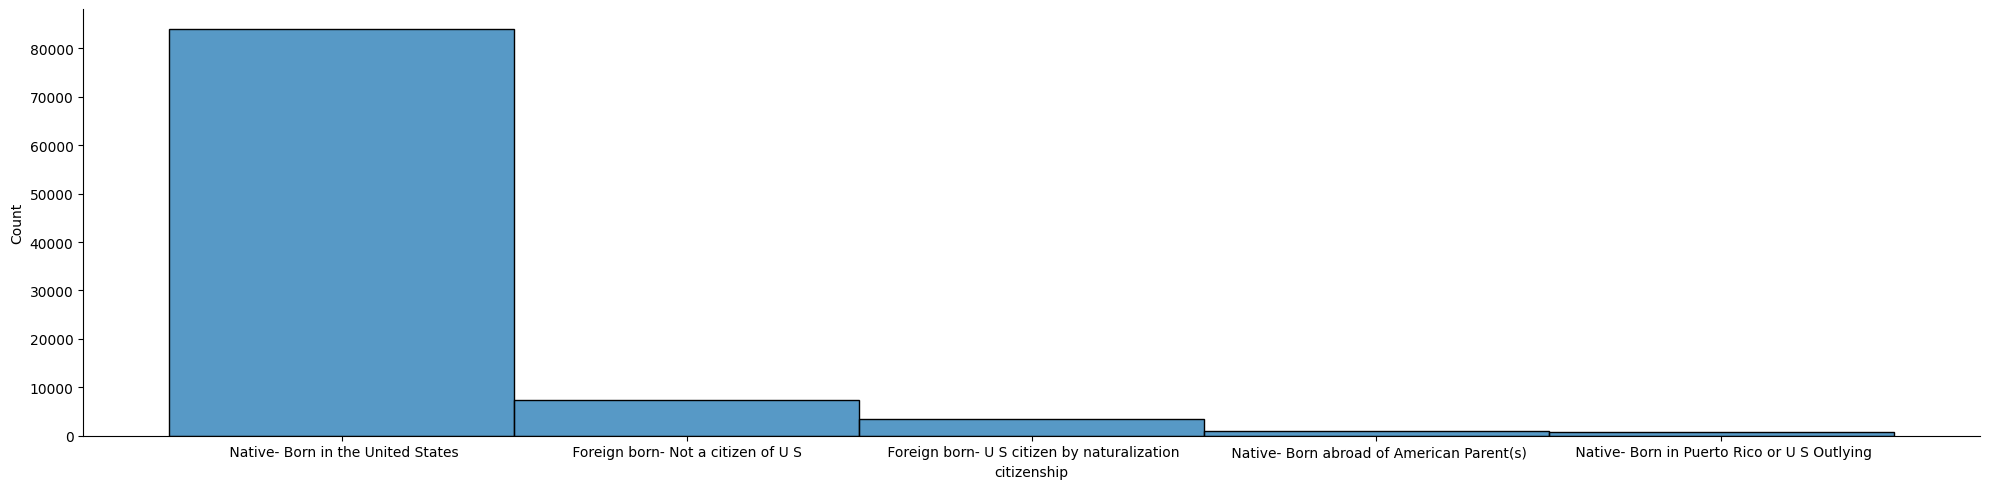

In [44]:
# citizenship
# Most data points seem to belong to native us citizens
sns.displot(data=df_train_raw, x="citizenship", height=5, aspect=4)

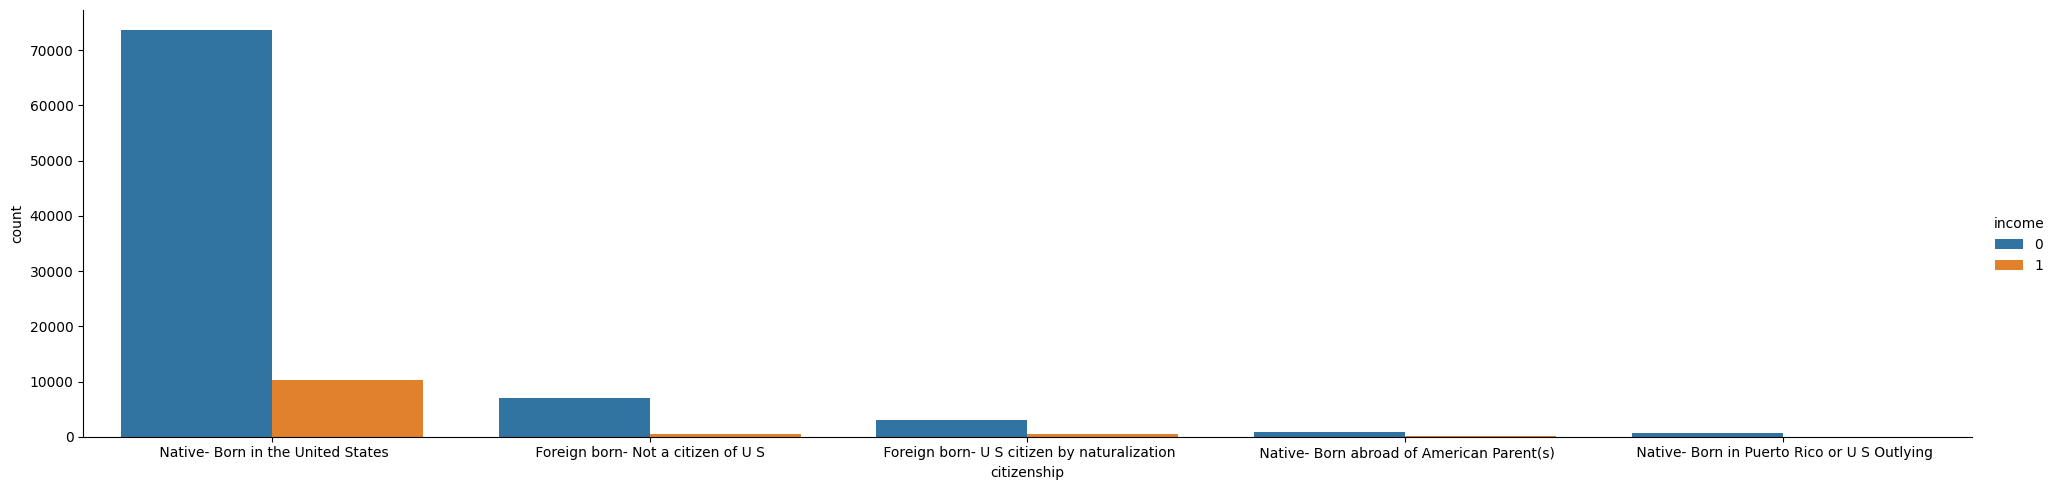

In [45]:
# Natural born and naturalised us citizens seem to have the highest proportion of high income earners on average
sns.catplot(data=df_train_raw, x="citizenship", kind="count", hue='income', height=5, aspect=4)

### Weeks Worked

In [46]:
# weeks worked in year
# This shows that higher income earners tend to work more weeks per year
df_train_raw.groupby('income').describe()['weeks worked in year']

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
0,85059.0,44.586804,14.458512,0.0,45.0,52.0,52.0,52.0
1,11476.0,50.775706,5.276170,0.0,52.0,52.0,52.0,52.0


## Correlation with Income

We check if the variables we chose (decided are relevant from all features) are correlated with our variable of interest

In [47]:
import scipy.stats as stats

In [48]:
# We use point biserial correlation for the numerical features since our variable of interest is binary

numerical_features = ['age','capital gains','capital losses','dividends from stocks','num persons worked for employer', 'weeks worked in year']

for feat in numerical_features:
    print(feat,':', stats.pointbiserialr(df_train_raw['income'], df_train_raw[feat])[0])

age : 0.1670050211207919
capital gains : 0.23573722828010962
capital losses : 0.14213490609092477
dividends from stocks : 0.1635678177881181
num persons worked for employer : 0.09466024800956577
weeks worked in year : 0.14473767978333857


In [49]:
df_train_raw.columns

Index(['age', 'class of worker', 'education', 'marital stat', 'race', 'sex',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'citizenship', 'weeks worked in year', 'income'],
      dtype='object')

In [50]:

categorical_features = ['class of worker', 'education', 'marital stat', 'race', 'sex', 'full or part time employment stat', 'citizenship']

for feat in categorical_features:
    observed = pd.crosstab(df_train_raw[feat], df_train_raw['income'])
    p_value = stats.chi2_contingency(observed)
    print(feat, ':', p_value[1])

class of worker : 0.0
education : 0.0
marital stat : 0.0
race : 3.079604969766344e-90
sex : 0.0
full or part time employment stat : 2.405992971968786e-74
citizenship : 5.750738232766031e-67


/var/folders/gt/7pk_lv810tvffkysjpvrfph80000gn/T/ipykernel_51234/419026892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_raw.corr()


<AxesSubplot: >

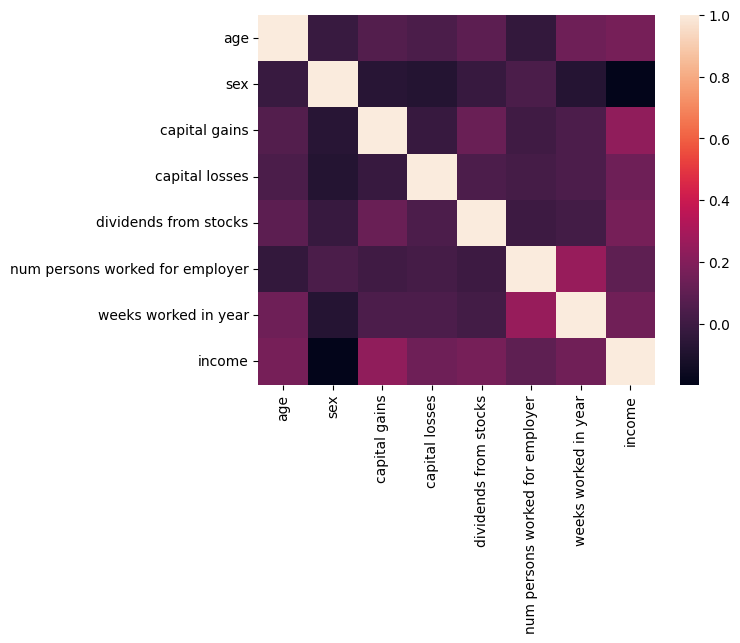

In [51]:
corr = df_train_raw.corr()
sns.heatmap(corr)

## Saving Clean Datasets

In [52]:
df_train_raw = df_train_raw.reset_index(drop=True)
df_test_raw = df_test_raw.reset_index(drop=True)

In [53]:
df_train_raw.to_csv('data/census_train_clean.csv')
df_test_raw.to_csv('data/census_test_clean.csv')